Here, we read the CNs for different models, in order to compare different k-space precisions and their influence on the CN value. Hopefully, the .5 errors have been resolved at hi-res.

In [73]:
import numpy as np

## LCAO

There seems to be a memory cap of 1 GB. What we need to do, first and foremost, is to go in there and extract the smaller matrices that we intend to use first. (cf. read_cn.ipynb)

In [74]:
#misc. kz precision <100
x_3000_1=np.load('LCAO_cn_3000_1.npy') #out of 200 steps
x_1000_20=np.load('LCAO_cn_1000_20.npy') #out of 200 steps
x_400_60=np.load('LCAO_cn_400_60.npy') #out of 60

In [75]:
#kz precision 100
x_10_100=np.load('LCAO_cn_10_100.npy')
x_200_100=np.load('LCAO_cn_200_100.npy')
x_600_100=np.load('LCAO_cn_600_100.npy')

In [76]:
#kz precision 200
x_150_200=np.load('LCAO_cn_150_200.npy')
x_200_200=np.load('LCAO_cn_200_200.npy')
x_400_200=np.load('LCAO_cn_400_200.npy')

For clarity, we'll nudge the markers out of each others' way. They're all satisfactorily quantized, so no immediate & dire consequence will emerge from this.

In [77]:
#nudged datasets
def nudge(x,nud):
    m=[]
    y=np.array(x)
    z=len(y)
    for i in range(len(x)):
        n=x[i]+nud
        m.append(n)
    return m

m_3000_1=x_3000_1
m_150_200=nudge(x_150_200,0.025)
m_1000_20=nudge(x_1000_20,0.05)
m_10_100=nudge(x_10_100,0.075)
m_200_200=nudge(x_200_200,0.1)
m_400_60=nudge(x_400_60,0.125)
m_400_200=nudge(x_400_200,0.15)
m_600_100=nudge(x_600_100,0.175)
m_200_100=nudge(x_200_100,0.2)

We need to compare the numbers in a sane way. However, there are a lot of things to look at:

1) the total chern number for all orbitals together (hopefully 0)

2) total chern number per band

from then, we can also look at

3) chern number per step

as this would help us see what happens to the 0.5s, and if there is a strong variability in cn values with precision.

We currently have 3) available in the matrices above; obtaining 1) and 2) from this should be a piece of cake.

Now, we need to present the data. A good way to do this would be to use a scatter plot. This would allow us to see when the data disagrees.

One obstacle to this method is the difference in kz step number. We should set it up on a 200-step x-axis, and find a way to add the data points at the appropriate places.

1) The 'complete' 200-step ones do not need to be changed. 

2) The 'incomplete' 200-step ones should have blank points added.

3) The 100-step ones need to have alternating blank points and data points.

4) The 60-step data set should have a data point every 3.33 spots, wit blank points in between. Having a continuous x-axis should accomodate this.

Thus, a histogram approach is not recommendable. Rather, a continuous scatter plot is the judicious choice.

First, the different orbitals need to be selected:

In [78]:
o0_3000_1=m_3000_1[0]
o1_3000_1=m_3000_1[1]
o2_3000_1=m_3000_1[2]
o3_3000_1=m_3000_1[3]
o4_3000_1=m_3000_1[4]
o5_3000_1=m_3000_1[5]

o0_1000_20=m_1000_20[0]
o1_1000_20=m_1000_20[1]
o2_1000_20=m_1000_20[2]
o3_1000_20=m_1000_20[3]
o4_1000_20=m_1000_20[4]
o5_1000_20=m_1000_20[5]

o0_10_100=m_10_100[0]
o1_10_100=m_10_100[1]
o2_10_100=m_10_100[2]
o3_10_100=m_10_100[3]
o4_10_100=m_10_100[4]
o5_10_100=m_10_100[5]

o0_150_200=m_150_200[0]
o1_150_200=m_150_200[1]
o2_150_200=m_150_200[2]
o3_150_200=m_150_200[3]
o4_150_200=m_150_200[4]
o5_150_200=m_150_200[5]

o0_200_100=m_200_100[0]
o1_200_100=m_200_100[1]
o2_200_100=m_200_100[2]
o3_200_100=m_200_100[3]
o4_200_100=m_200_100[4]
o5_200_100=m_200_100[5]

o0_200_200=m_200_200[0]
o1_200_200=m_200_200[1]
o2_200_200=m_200_200[2]
o3_200_200=m_200_200[3]
o4_200_200=m_200_200[4]
o5_200_200=m_200_200[5]

o0_400_60=m_400_60[0]
o1_400_60=m_400_60[1]
o2_400_60=m_400_60[2]
o3_400_60=m_400_60[3]
o4_400_60=m_400_60[4]
o5_400_60=m_400_60[5]

o0_400_200=m_400_200[0]
o1_400_200=m_400_200[1]
o2_400_200=m_400_200[2]
o3_400_200=m_400_200[3]
o4_400_200=m_400_200[4]
o5_400_200=m_400_200[5]

o0_600_100=m_600_100[0]
o1_600_100=m_600_100[1]
o2_600_100=m_600_100[2]
o3_600_100=m_600_100[3]
o4_600_100=m_600_100[4]
o5_600_100=m_600_100[5]

In [79]:
#defining the x-linspaces

#200
axis_200=np.linspace(-np.pi,np.pi,200)

#100
axis_100=np.linspace(-np.pi,np.pi,100)

#60
axis_60=np.linspace(-np.pi,np.pi,60)

#20
def axis_20_fct():
    em=[]
    for i in range(20):
        en=axis_200[i]
        em.append(en)
    return em

axis_20=axis_20_fct()

#1
axis_1=-np.pi

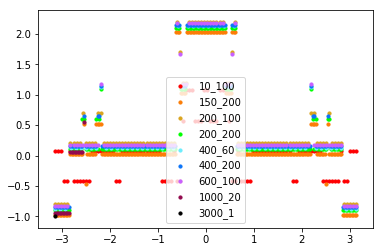

In [80]:
import matplotlib.pyplot as plt

def plot_cn_0():
    fig, ax = plt.subplots()
    size=10
    ax.scatter(axis_100,o0_10_100,s=size,c='#fe0002',label='10_100')
    ax.scatter(axis_200,o0_150_200,s=size,c='#fb7d07',label='150_200')
    ax.scatter(axis_100,o0_200_100,s=size,c='goldenrod',label='200_100')
    ax.scatter(axis_200,o0_200_200,s=size,c='lime',label='200_200')
    ax.scatter(axis_60,o0_400_60,s=size,c='#6dedfd',label='400_60')
    ax.scatter(axis_200,o0_400_200,s=size,c='#0d75f8',label='400_200')
    ax.scatter(axis_100,o0_600_100,s=size,c='#c760ff',label='600_100')
    ax.scatter(axis_20,o0_1000_20,s=size,c='#920a4e',label='1000_20')
    ax.scatter(axis_1,o0_3000_1,s=size,c='black',label='3000_1')
    ax.legend()
    plt.show()
    
plot_cn_0()

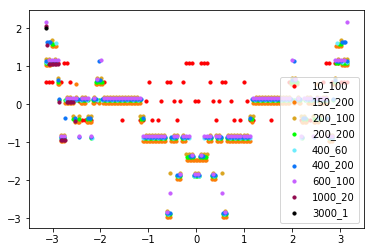

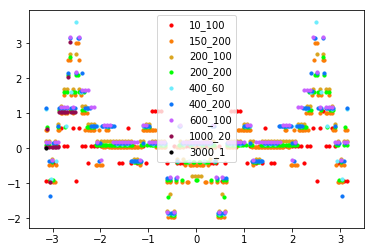

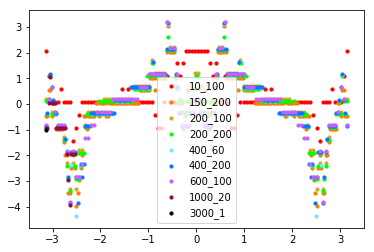

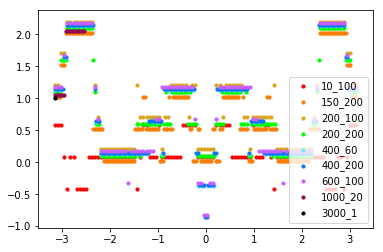

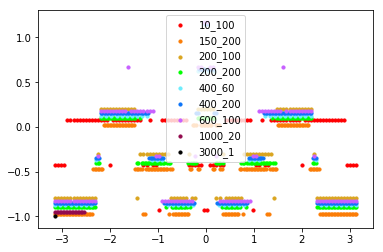

In [81]:
def plot_cn_1():
    fig, ax = plt.subplots()
    size=10
    ax.scatter(axis_100,o1_10_100,s=size,c='#fe0002',label='10_100')
    ax.scatter(axis_200,o1_150_200,s=size,c='#fb7d07',label='150_200')
    ax.scatter(axis_100,o1_200_100,s=size,c='goldenrod',label='200_100')
    ax.scatter(axis_200,o1_200_200,s=size,c='lime',label='200_200')
    ax.scatter(axis_60,o1_400_60,s=size,c='#6dedfd',label='400_60')
    ax.scatter(axis_200,o1_400_200,s=size,c='#0d75f8',label='400_200')
    ax.scatter(axis_100,o1_600_100,s=size,c='#c760ff',label='600_100')
    ax.scatter(axis_20,o1_1000_20,s=size,c='#920a4e',label='1000_20')
    ax.scatter(axis_1,o1_3000_1,s=size,c='black',label='3000_1')
    ax.legend()
    plt.show()

def plot_cn_2():
    fig, ax = plt.subplots()
    size=10
    ax.scatter(axis_100,o2_10_100,s=size,c='#fe0002',label='10_100')
    ax.scatter(axis_200,o2_150_200,s=size,c='#fb7d07',label='150_200')
    ax.scatter(axis_100,o2_200_100,s=size,c='goldenrod',label='200_100')
    ax.scatter(axis_200,o2_200_200,s=size,c='lime',label='200_200')
    ax.scatter(axis_60,o2_400_60,s=size,c='#6dedfd',label='400_60')
    ax.scatter(axis_200,o2_400_200,s=size,c='#0d75f8',label='400_200')
    ax.scatter(axis_100,o2_600_100,s=size,c='#c760ff',label='600_100')
    ax.scatter(axis_20,o2_1000_20,s=size,c='#920a4e',label='1000_20')
    ax.scatter(axis_1,o2_3000_1,s=size,c='black',label='3000_1')
    ax.legend()
    plt.show()

def plot_cn_3():
    fig, ax = plt.subplots()
    size=10
    ax.scatter(axis_100,o3_10_100,s=size,c='#fe0002',label='10_100')
    ax.scatter(axis_200,o3_150_200,s=size,c='#fb7d07',label='150_200')
    ax.scatter(axis_100,o3_200_100,s=size,c='goldenrod',label='200_100')
    ax.scatter(axis_200,o3_200_200,s=size,c='lime',label='200_200')
    ax.scatter(axis_60,o3_400_60,s=size,c='#6dedfd',label='400_60')
    ax.scatter(axis_200,o3_400_200,s=size,c='#0d75f8',label='400_200')
    ax.scatter(axis_100,o3_600_100,s=size,c='#c760ff',label='600_100')
    ax.scatter(axis_20,o3_1000_20,s=size,c='#920a4e',label='1000_20')
    ax.scatter(axis_1,o3_3000_1,s=size,c='black',label='3000_1')
    ax.legend()
    plt.show()

def plot_cn_4():
    fig, ax = plt.subplots()
    size=10
    ax.scatter(axis_100,o4_10_100,s=size,c='#fe0002',label='10_100')
    ax.scatter(axis_200,o4_150_200,s=size,c='#fb7d07',label='150_200')
    ax.scatter(axis_100,o4_200_100,s=size,c='goldenrod',label='200_100')
    ax.scatter(axis_200,o4_200_200,s=size,c='lime',label='200_200')
    ax.scatter(axis_60,o4_400_60,s=size,c='#6dedfd',label='400_60')
    ax.scatter(axis_200,o4_400_200,s=size,c='#0d75f8',label='400_200')
    ax.scatter(axis_100,o4_600_100,s=size,c='#c760ff',label='600_100')
    ax.scatter(axis_20,o4_1000_20,s=size,c='#920a4e',label='1000_20')
    ax.scatter(axis_1,o4_3000_1,s=size,c='black',label='3000_1')
    ax.legend()
    plt.show()

def plot_cn_5():
    fig, ax = plt.subplots()
    size=10
    ax.scatter(axis_100,o5_10_100,s=size,c='#fe0002',label='10_100')
    ax.scatter(axis_200,o5_150_200,s=size,c='#fb7d07',label='150_200')
    ax.scatter(axis_100,o5_200_100,s=size,c='goldenrod',label='200_100')
    ax.scatter(axis_200,o5_200_200,s=size,c='lime',label='200_200')
    ax.scatter(axis_60,o5_400_60,s=size,c='#6dedfd',label='400_60')
    ax.scatter(axis_200,o5_400_200,s=size,c='#0d75f8',label='400_200')
    ax.scatter(axis_100,o5_600_100,s=size,c='#c760ff',label='600_100')
    ax.scatter(axis_20,o5_1000_20,s=size,c='#920a4e',label='1000_20')
    ax.scatter(axis_1,o5_3000_1,s=size,c='black',label='3000_1')
    ax.legend()
    plt.show()

plot_cn_1()
plot_cn_2()
plot_cn_3()
plot_cn_4()
plot_cn_5()

It seems that 600 is the threshhold at which the cn calculation follows higher precision calculations;

However, upon closer observation, it still contains 0.5's.

1000 contains 0.5's still.

An important question remains: can we predict in what direction a 0.5 will go? Since each point is coupled to another in order to have 0 total cn, then this will be very difficult to say.

Let's plot the 600, 1000 & 3000 in order to have a more precise idea of what's going on.

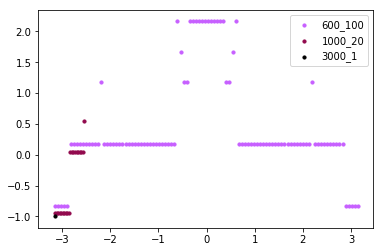

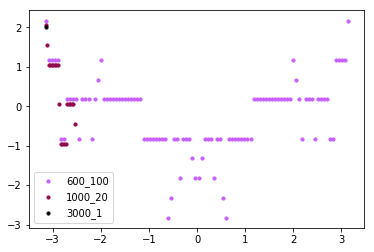

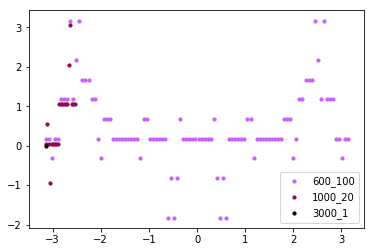

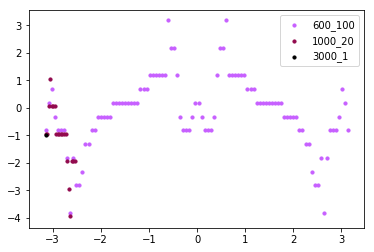

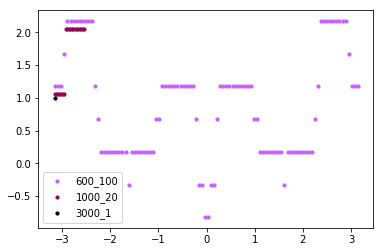

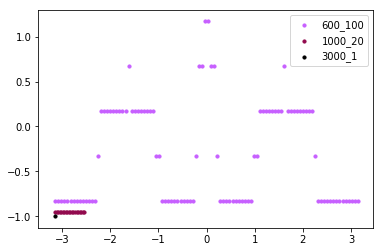

In [82]:
def plot_cn_0_up():
    fig, ax = plt.subplots()
    size=10
    ax.scatter(axis_100,o0_600_100,s=size,c='#c760ff',label='600_100')
    ax.scatter(axis_20,o0_1000_20,s=size,c='#920a4e',label='1000_20')
    ax.scatter(axis_1,o0_3000_1,s=size,c='black',label='3000_1')
    ax.legend()
    plt.show()

def plot_cn_1_up():
    fig, ax = plt.subplots()
    size=10
    ax.scatter(axis_100,o1_600_100,s=size,c='#c760ff',label='600_100')
    ax.scatter(axis_20,o1_1000_20,s=size,c='#920a4e',label='1000_20')
    ax.scatter(axis_1,o1_3000_1,s=size,c='black',label='3000_1')
    ax.legend()
    plt.show()

def plot_cn_2_up():
    fig, ax = plt.subplots()
    size=10
    ax.scatter(axis_100,o2_600_100,s=size,c='#c760ff',label='600_100')
    ax.scatter(axis_20,o2_1000_20,s=size,c='#920a4e',label='1000_20')
    ax.scatter(axis_1,o2_3000_1,s=size,c='black',label='3000_1')
    ax.legend()
    plt.show()

def plot_cn_3_up():
    fig, ax = plt.subplots()
    size=10
    ax.scatter(axis_100,o3_600_100,s=size,c='#c760ff',label='600_100')
    ax.scatter(axis_20,o3_1000_20,s=size,c='#920a4e',label='1000_20')
    ax.scatter(axis_1,o3_3000_1,s=size,c='black',label='3000_1')
    ax.legend()
    plt.show()

def plot_cn_4_up():
    fig, ax = plt.subplots()
    size=10
    ax.scatter(axis_100,o4_600_100,s=size,c='#c760ff',label='600_100')
    ax.scatter(axis_20,o4_1000_20,s=size,c='#920a4e',label='1000_20')
    ax.scatter(axis_1,o4_3000_1,s=size,c='black',label='3000_1')
    ax.legend()
    plt.show()

def plot_cn_5_up():
    fig, ax = plt.subplots()
    size=10
    ax.scatter(axis_100,o5_600_100,s=size,c='#c760ff',label='600_100')
    ax.scatter(axis_20,o5_1000_20,s=size,c='#920a4e',label='1000_20')
    ax.scatter(axis_1,o5_3000_1,s=size,c='black',label='3000_1')
    ax.legend()
    plt.show()

plot_cn_0_up()
plot_cn_1_up()
plot_cn_2_up()
plot_cn_3_up()
plot_cn_4_up()
plot_cn_5_up()

It's hard to say what's going on exactly, since there's one occasion where 600 is quantized properly, and 1000 isn't! That's quite odd. It might be informative to scan everything with 3000, but who knows how long that would take??
In any case, due to the apparent symmetry, it would be sufficient to only scan half of the kz zbr space, so 3000_100. That alone might make the computer shit itself, but it could be worth a shot. We won't save the file, only the extracted 5 kB file will be necessary.